## Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

## Data Collection

In [2]:
# loading the heart dataset to a pandas DataFrame
df=pd.read_csv('heart.csv')

## Exploratory Data Analysis (EDA)

In [3]:
# printing the first five rows of the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# printing the last five rows of the data
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
# number of rows and columns in the dataset
df.shape

(1025, 14)

In [6]:
# concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# statistical measures of the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# checking the number of null values in each column
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# number of distinct values in the target column of the data
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [10]:
# average of each column for the distinct values in target column
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


## Data Visualization

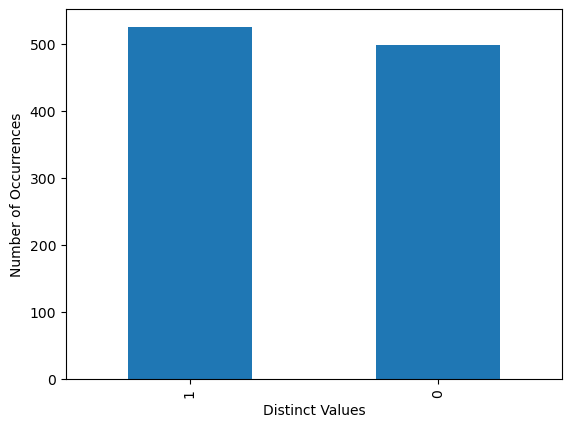

In [11]:
# plotting the number of distinct values in the target column (to check how well the target column is balanced)
df['target'].value_counts().plot(kind="bar")
plt.xlabel("Distinct Values")
plt.ylabel("Number of Occurrences")
plt.show()

#### Inference: Here from the above visualization it is clearly visible that the data is almost balanced because the number of person with heart disease is almost equal to the number of person without heart disease.

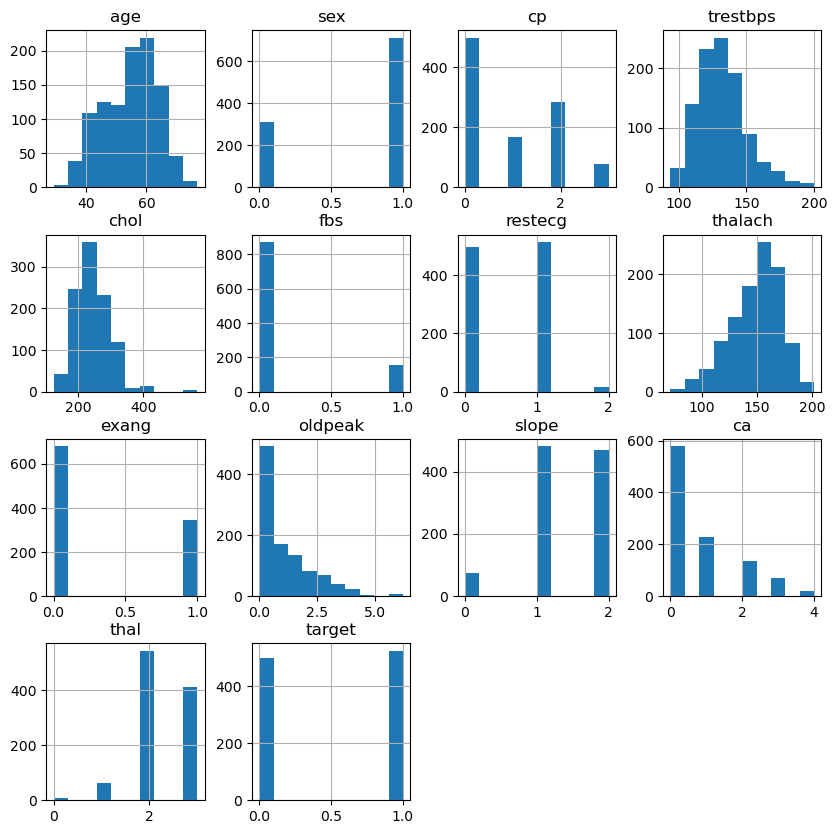

In [12]:
# plotting the data distribution plots
df.hist(figsize = (10,10))
plt.show()

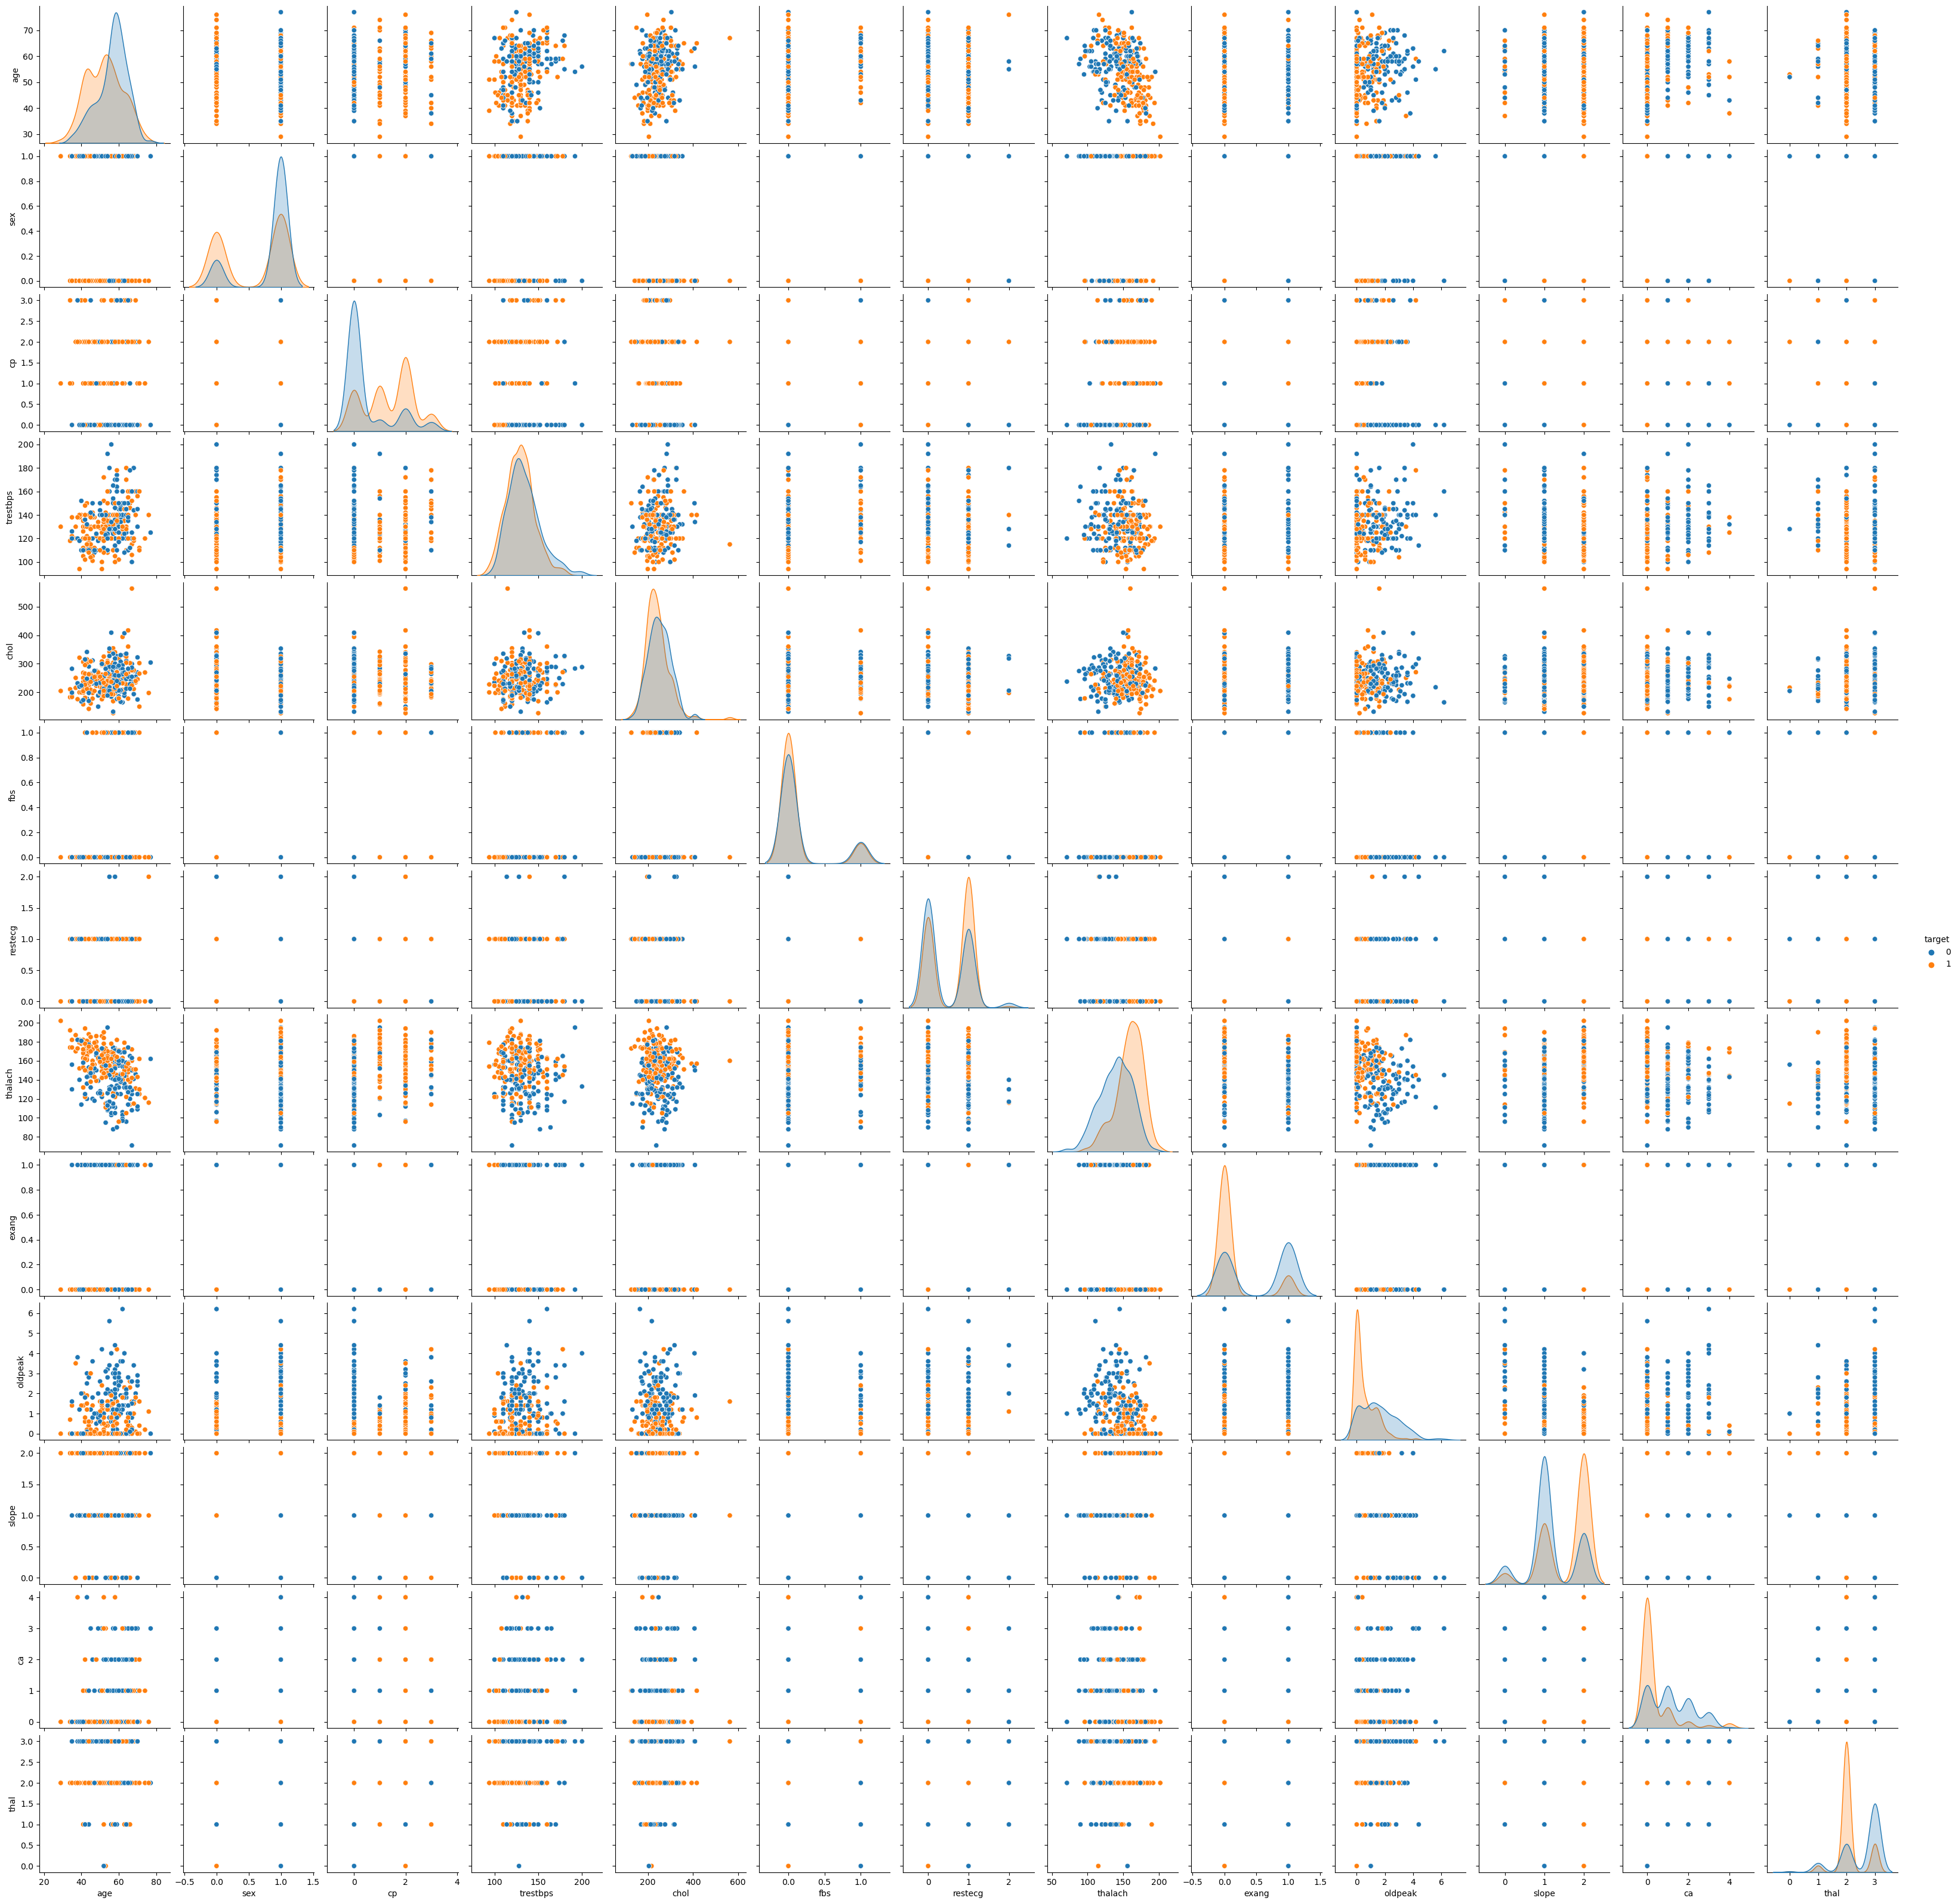

In [13]:
# plot pairwise relationships between variables
sns.pairplot(df, hue='target')
plt.show()

## Correlation between all the features

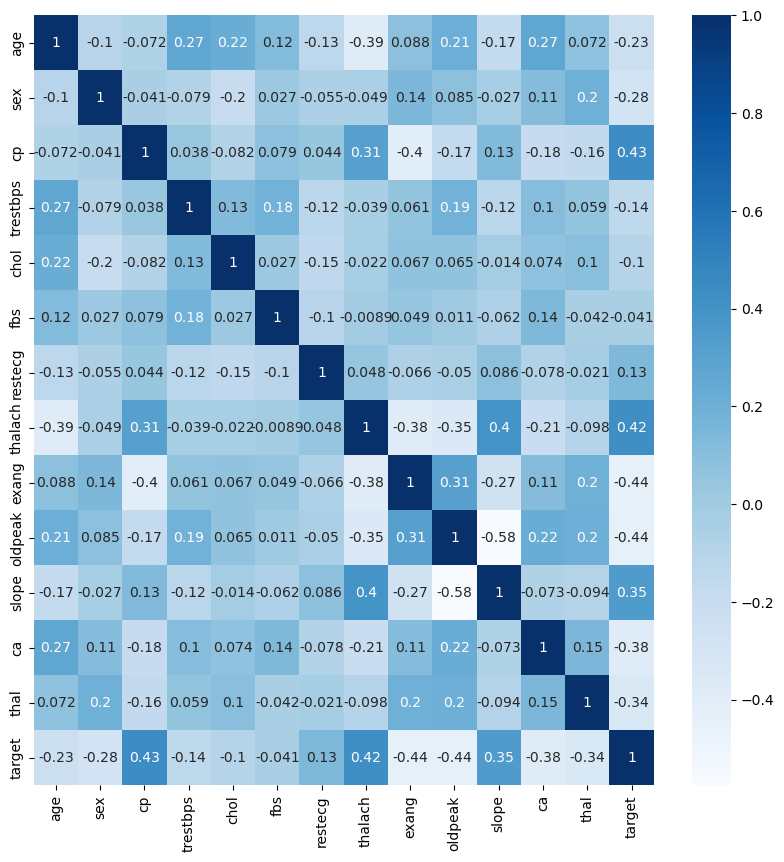

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,cmap ='Blues')
plt.show()

## Seperating the data and label

In [15]:
# seperating the data and label into X and Y respectively
X=df.iloc[:,0:13]
Y=df['target']

In [16]:
#printing X
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [17]:
#printing Y
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


## Scaling the Data
### Data Standardization

In [18]:
scaler= StandardScaler()
scaler.fit(X)
standardized_data=scaler.transform(X)
print(standardized_data)

[[-0.26843658  0.66150409 -0.91575542 ...  0.99543334  1.20922066
   1.08985168]
 [-0.15815703  0.66150409 -0.91575542 ... -2.24367514 -0.73197147
   1.08985168]
 [ 1.71659547  0.66150409 -0.91575542 ... -2.24367514 -0.73197147
   1.08985168]
 ...
 [-0.81983438  0.66150409 -0.91575542 ... -0.6241209   0.23862459
  -0.52212231]
 [-0.4889957  -1.51170646 -0.91575542 ...  0.99543334 -0.73197147
  -0.52212231]
 [-0.04787747  0.66150409 -0.91575542 ... -0.6241209   0.23862459
   1.08985168]]


In [19]:
X = standardized_data
Y= df['target']

In [20]:
# print X and Y
print("X is: ",X)
print("*************************************************************************")
print("Y is: ",Y)

X is:  [[-0.26843658  0.66150409 -0.91575542 ...  0.99543334  1.20922066
   1.08985168]
 [-0.15815703  0.66150409 -0.91575542 ... -2.24367514 -0.73197147
   1.08985168]
 [ 1.71659547  0.66150409 -0.91575542 ... -2.24367514 -0.73197147
   1.08985168]
 ...
 [-0.81983438  0.66150409 -0.91575542 ... -0.6241209   0.23862459
  -0.52212231]
 [-0.4889957  -1.51170646 -0.91575542 ...  0.99543334 -0.73197147
  -0.52212231]
 [-0.04787747  0.66150409 -0.91575542 ... -0.6241209   0.23862459
   1.08985168]]
*************************************************************************
Y is:  0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


## Train Test Split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y,random_state=1)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


In [23]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1025,) (820,) (205,)


## Model Building

In [24]:
# Building the model using Logistic Regression
classifier = LogisticRegression()

## Training the Model

In [25]:
# training the Logistic Regression Model
classifier.fit(X_train, Y_train)

LogisticRegression()

## Model Evaluation
#### Accuracy Score

In [26]:
# accuracy score on the training data
train_prediction= classifier.predict(X_train)
train_accuracy= accuracy_score(train_prediction, Y_train)
print("Accuracy score on the training data is: ",train_accuracy)

Accuracy score on the training data is:  0.8439024390243902


In [27]:
# accuracy score on the test data
test_prediction= classifier.predict(X_test)
test_accuracy= accuracy_score(test_prediction, Y_test)
print("Accuracy score on the test data is: ",test_accuracy)

Accuracy score on the test data is:  0.8341463414634146


#### Classification report and confusion matrix of the Logistic Regression model

In [28]:
print(confusion_matrix(test_prediction, Y_test))
print(classification_report(test_prediction, Y_test))

[[76 10]
 [24 95]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        86
           1       0.90      0.80      0.85       119

    accuracy                           0.83       205
   macro avg       0.83      0.84      0.83       205
weighted avg       0.84      0.83      0.84       205



## Making a Prediction System

In [29]:
# taking a random input data for prediction
input_data= (66,0,0,178,228,1,1,165,1,1,1,2,3)

# converting the input data into numpy array
input_data_nparray =np.asarray(input_data)

# reshape the array as we are predicting for only one instance
input_data_reshaped =input_data_nparray.reshape(1,-1)

# standardize the reshaped input data
std_data =scaler.transform(input_data_reshaped)

# predict for the input data
prediction=classifier.predict(std_data)

if (prediction[0]==1):
    print("The person has heart disease")
else:
    print("The person doesn't have heart disease")

The person doesn't have heart disease
